# Logistic Regression on Titanic Dataset

# Dataset Description

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic-1.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data



In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#data=data.dropna()


In [7]:
data.shape

(891, 12)

In [8]:
data["Age"]=data["Age"].fillna(data["Age"].mean())
#data["Age"].fillna(data["Age"].mean,inplace=True)

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#data=data.drop(["Cabin"],axis=1)
#cabin has 687 values missing if we replcae with central tendncy it is of no use cause the ct will be not representative and we cannot do drop na as it deletes entire row , so inthis case this column is of least impact to my model so we remove this column itself
data.drop("Cabin",axis=1,inplace=True)

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
#to remove embarked data because only 2 data is missing we can drop it it wont impact the model
data=data.dropna()

In [14]:
data.shape

(889, 11)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

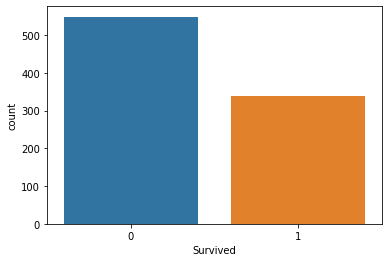

In [15]:
sns.countplot(data["Survived"])

In [16]:
data["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

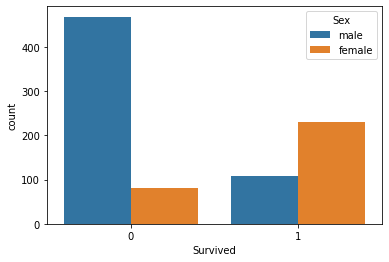

In [17]:
sns.countplot(x='Survived',hue='Sex',data=data)

In [18]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [19]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
#one hot encoding
sex=pd.get_dummies(data["Sex"],drop_first=True) #drop first will remove one column ie 1st column and single col is sufficient as 1-male 0-female
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
Embark=pd.get_dummies(data["Embarked"],drop_first=True)
Embark


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
data=pd.concat([data,sex,Embark],axis=1) #concat diff dataframe in column wise
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [28]:
data=data.drop(["Sex","Embarked"],axis=1)# since we added encoded values we can remove these columns

In [29]:
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# data=pd.concat([data,sex,Embark],axis=1)
# data.head(5)


Great! Our data is ready for our model!

# Building a Classification model

Let's start by splitting our data into a training set and test set 

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X=data.drop(["Survived"],axis=1)
y=data["Survived"]

In [31]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Age     889 non-null    float64
 2   SibSp   889 non-null    int64  
 3   Parch   889 non-null    int64  
 4   Fare    889 non-null    float64
 5   male    889 non-null    uint8  
 6   Q       889 non-null    uint8  
 7   S       889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 84.3 KB


In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [35]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(711, 8)
(711,)
(178, 8)
(178,)


In [36]:
# Build a Model

from sklearn.linear_model import LogisticRegression

LF=LogisticRegression()

# Train the model
LF.fit(xtrain,ytrain)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [38]:
#For Training performance
Ypredtr=LF.predict(xtrain)

In [39]:
from sklearn.metrics import accuracy_score


In [40]:
print("The accuracy of training data")
acc=print(accuracy_score(ytrain,Ypredtr))


The accuracy of training data
0.7918424753867792


In [44]:
from sklearn.metrics import confusion_matrix
#help(confusion_matrix)
cm=confusion_matrix(ytrain,Ypredtr)

In [45]:
cm

array([[368,  66],
       [ 82, 195]])

In [46]:
# testing performance
ypredtest=LF.predict(xtest)

In [47]:
print("The accuracy of test  data")
acc=print(accuracy_score(ytest,ypredtest))


The accuracy of test  data
0.8202247191011236


In [ ]:
# End of Classification

# KNN Classification

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

In [50]:
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [51]:
ypredtrknn=knn_model.predict(xtrain)

In [52]:
print("The accuracy of train  data")
acc=print(accuracy_score(ytrain,ypredtrknn))

The accuracy of train  data
0.7693389592123769


In [53]:
ypredtesknn=knn_model.predict(xtest)

In [54]:
print("The accuracy of test  data")
acc=print(accuracy_score(ytest,ypredtesknn))

The accuracy of test  data
0.7359550561797753


#Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [57]:
ypredtrDT=DT.predict(xtrain)
print("The accuracy of train  data")
acc=print(accuracy_score(ytrain,ypredtrDT))

The accuracy of train  data
0.9817158931082982


In [58]:
ypredtesDT=DT.predict(xtest)
print("The accuracy of test  data")
acc=print(accuracy_score(ytest,ypredtesDT))

The accuracy of test  data
0.8258426966292135
